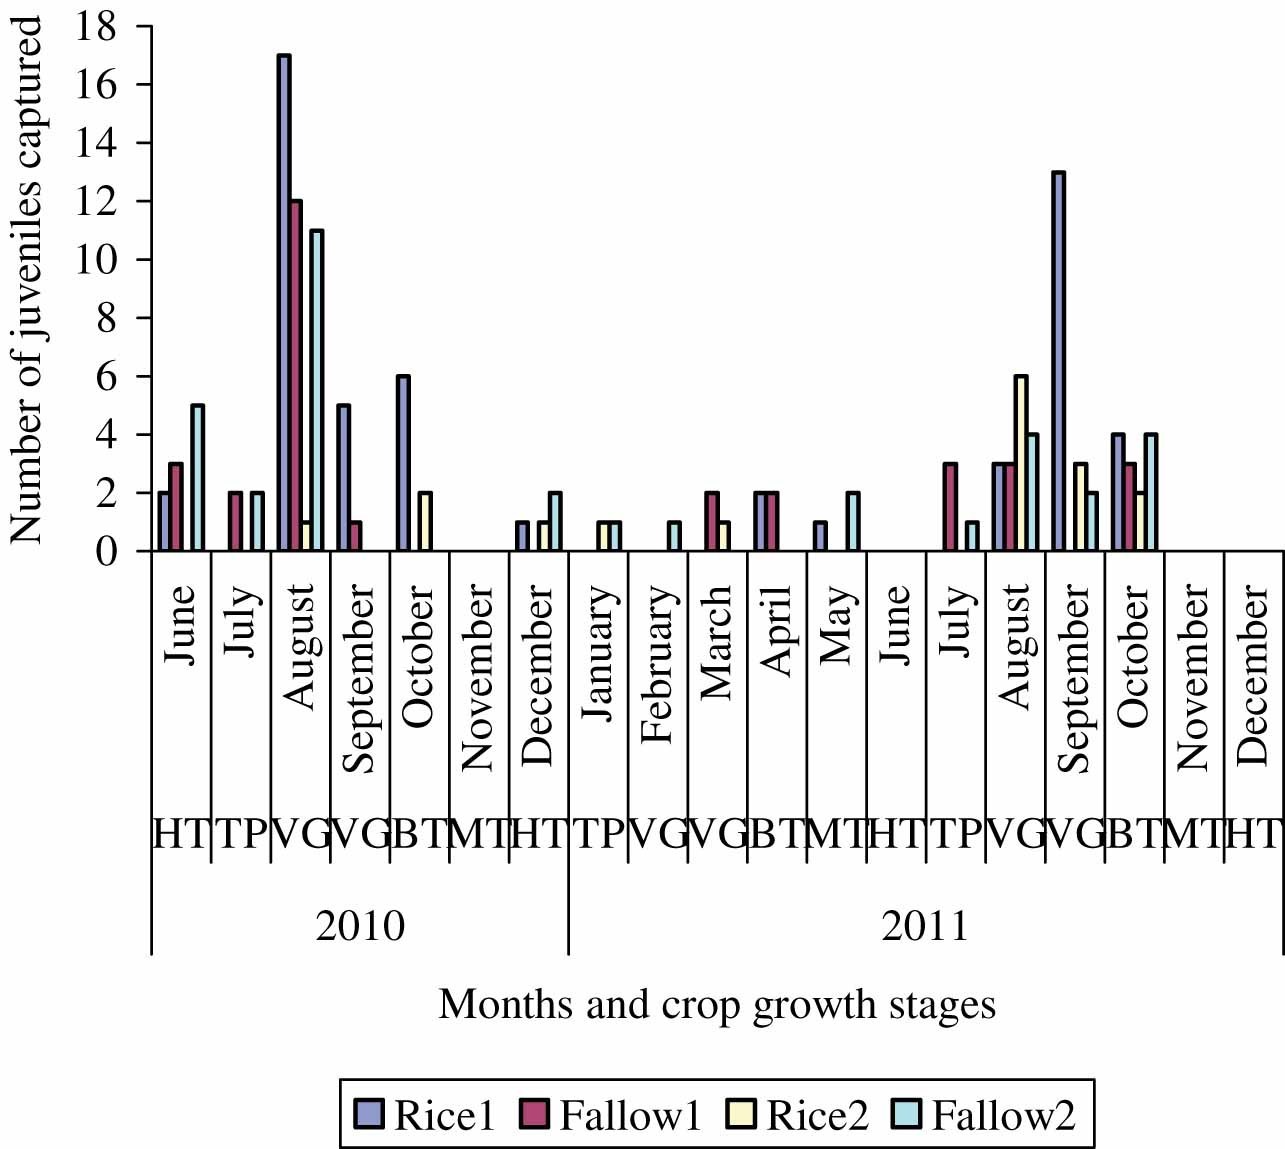

In [70]:
from IPython.display import Image
Image(filename='Distribution_juveniles_M_natalensis.png') 
#doi = {https://doi.org/10.1002/ps.3346},
#url = {https://onlinelibrary.wiley.com/doi/abs/10.1002/ps.3346},
#eprint = {https://onlinelibrary.wiley.com/doi/pdf/10.1002/ps.3346}

In [2]:
import numpy as np
from scipy.optimize import curve_fit
import pandas as pd
import math

df = pd.read_csv('Data_juveniles_M_natalensis.csv', usecols=['time', 'juveniles_no'])
df =df.rename(columns={'time':'datetime'})
df['datetime'] = pd.to_datetime(df["datetime"])
df = df.groupby(df.datetime.dt.month_name().str[:3]).agg(juveniles_no=('juveniles_no','sum'))
month_dict = {'Jan':1,'Feb':2,'Mar':3, 'Apr':4, 'May':5, 'Jun':6, 'Jul':7, 'Aug':8, 'Sep':9, 'Oct':10, 'Nov':11, 'Dec':12}
df = df.reset_index()
df = df.sort_values('datetime', key = lambda x : x.apply (lambda x : month_dict[x]))
df = df.reset_index(drop=True)
df = df.reset_index()
df['index'] = np.array(df['index'])+1

def FitFun(t, alpha0, k, s, varphi):
    return alpha0+ k * np.exp(-s * np.cos(np.pi*t/12 - varphi)**2)

df =df.rename(columns={'juveniles_no':'Mulungu_et_al_Pest_Manag_Sci_2013'})
x = np.array(df['index'])
y = np.array(df['Mulungu_et_al_Pest_Manag_Sci_2013'])

p0 = (3.0, 10.0, 5.0, 0.5) # start with values near those we expect
params, fit = curve_fit(FitFun, x, y, p0)
alpha0, k, s, varphi = params
# determine quality of the fit
squaredDiffs = np.square(y - FitFun(x, alpha0, k, s, varphi))
squaredDiffsFromMean = np.square(y - np.mean(y))
rSquared = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)
print(f"R² = {rSquared}")
df['Fun_fit'] =  FitFun(x, alpha0, k, s, varphi)

print(alpha0, k, s, varphi)



R² = 0.8824886229505169
5.115951601973117 55.60445016185958 26.036168508292228 0.5836800776614173


/tmp/ipykernel_1496/3375843422.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['datetime'] = pd.to_datetime(df["datetime"])


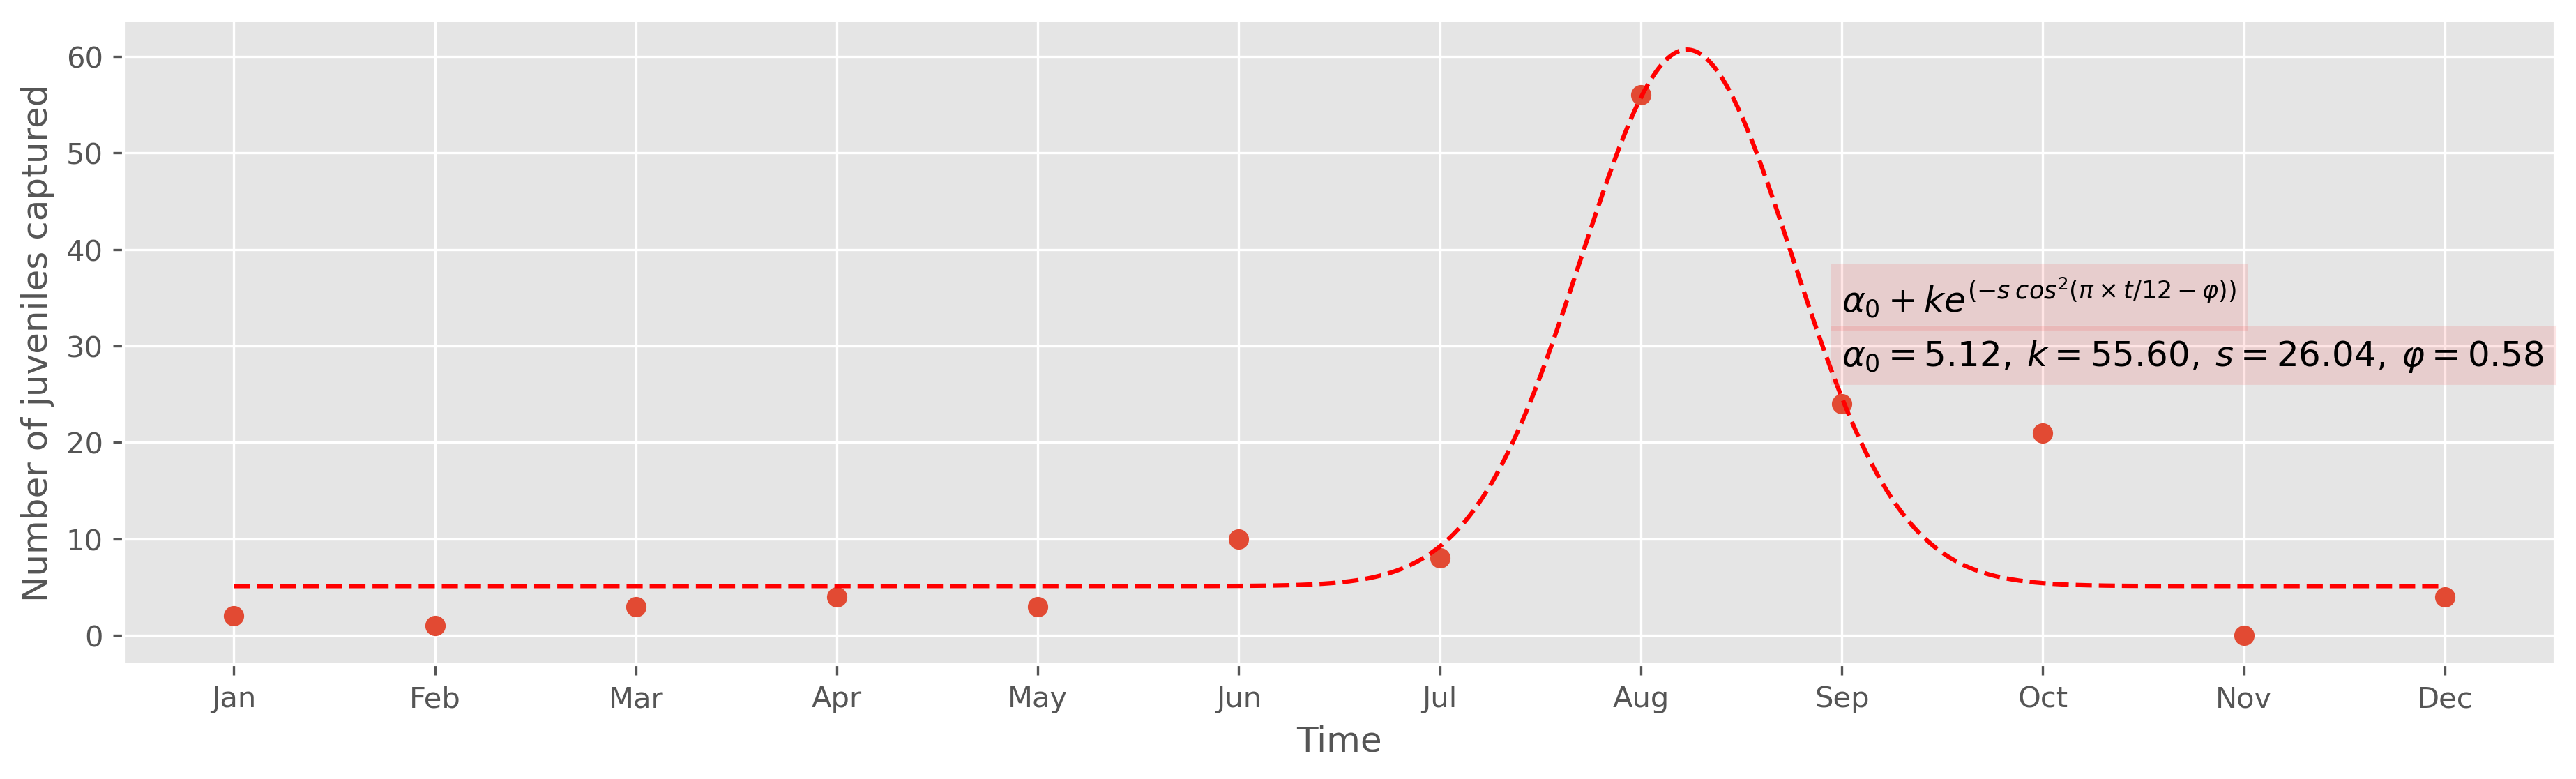

In [9]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [11, 6] #[W,H]
plt.rcParams['figure.dpi'] = 300
plt.style.use('ggplot')
#fig, [ax1, ax2] = plt.subplots(2, 1, sharex=True, gridspec_kw={'height_ratios': [3,1]})
ax = df.plot(
    y='Mulungu_et_al_Pest_Manag_Sci_2013',
    x='index',
    style="o",
    #title= r"Mastomys Natalensis Juveniles Distribution",
    xlabel="Time",
    ylabel="Number of juveniles captured",
    figsize=(15,4),
    #xlim=[start_time, end_time],
    #ylim=[20.0, 85.0],
)
t = np.arange(1, 12, 0.01)
ax.plot(t, FitFun(t, alpha0, k, s, varphi), '--r', label='fit') #f"fitted: $y = {a:.2f} e^{{(-{b:.2f}x)}} + {c:.2f}$"
#ax2.plot(x, df_srt['R_0 2 fit'], '--', label=f"fitted: $y = {a:.2f} e^{{(-{b:.2f}x)}} + {c:.2f}$")
#ax.legend('best')
ax.legend().remove()
ax.set_xticks(range(1, len(df.index)+1));
ax.set_xticklabels(df['datetime']);
#plt.xticks(rotation=90);
plt.text(9.0, 33.55, s=r"$ \alpha_0 + ke^{(- s\: cos^2(\pi\times t/12 - \varphi))}$", fontsize=12, bbox=dict(facecolor='red', alpha=0.1))
plt.text(9.0, 28, s=r"$ \alpha_0 =5.12,\: k = 55.60,\: s = 26.04,\: \varphi = 0.58$", fontsize=12, bbox=dict(facecolor='red', alpha=0.1))

plt.savefig('Mastomys_natalensis_juveniles_distribution.pdf', 
            metadata = {'Creator': 'Reju Sam John', 'Author': 'Reju', 'Title': 'Mastomys_natalensis_juveniles_distribution'},
           bbox_inches = 'tight', pad_inches = 0.2)
plt.show()

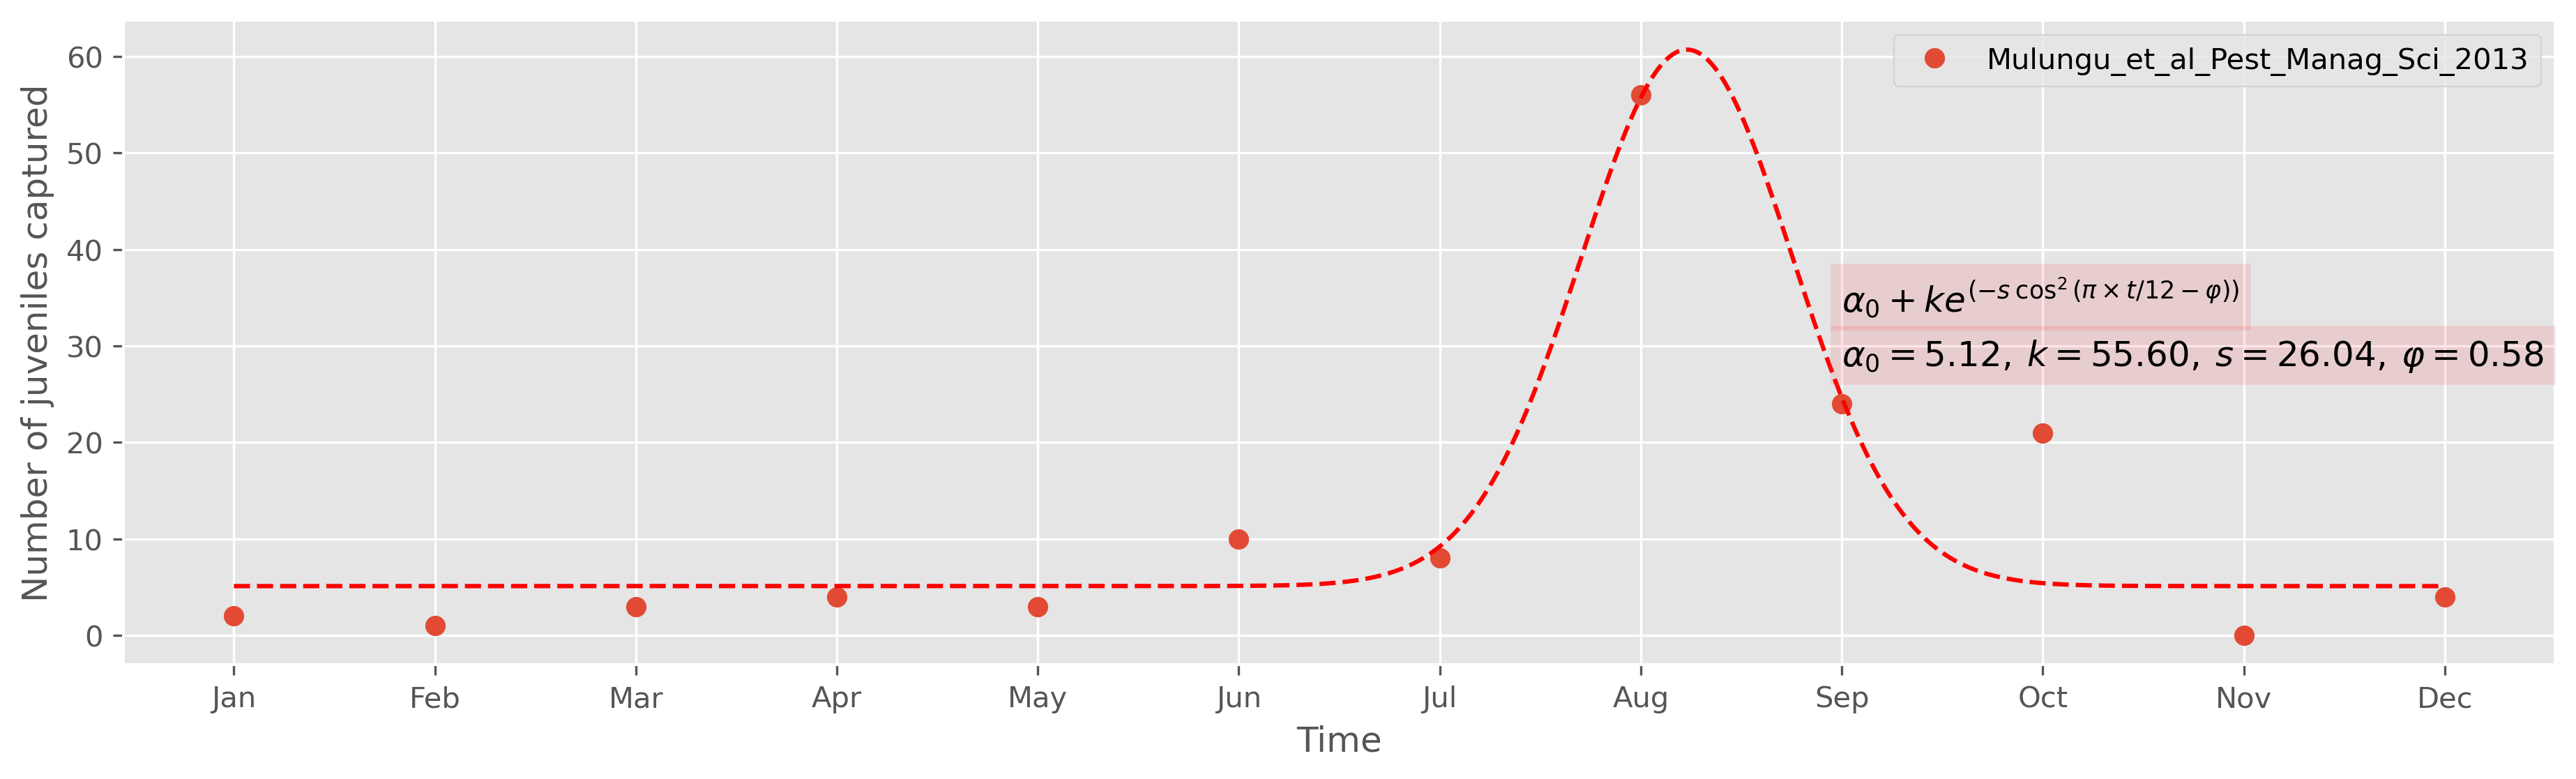

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Set the figure size and DPI
plt.rcParams['figure.figsize'] = [15, 4]  # [W,H]
plt.rcParams['figure.dpi'] = 300
plt.style.use('ggplot')

# Assuming df, FitFun, alpha0, k, s, and varphi are defined elsewhere in your code

# Plot the data
ax = df.plot(
    y='Mulungu_et_al_Pest_Manag_Sci_2013',
    x='index',
    style="o",
    xlabel="Time",
    ylabel="Number of juveniles captured",
)

# Generate a time array for the fitted curve
t = np.arange(1, 12, 0.01)
# Plot the fitted curve
ax.plot(t, FitFun(t, alpha0, k, s, varphi), '--r', label='fit')

# Set the x-axis ticks and labels
ax.set_xticks(range(1, len(df.index) + 1))
ax.set_xticklabels(df['datetime'])

# Annotate the equation with larger text
ax.text(9.0, 33.55, s=r"$ \alpha_0 + ke^{(- s\: \cos^2(\pi\times t/12 - \varphi))}$",
        fontsize=12, bbox=dict(facecolor='red', alpha=0.1))
ax.text(9.0, 28, s=r"$ \alpha_0 =5.12,\: k = 55.60,\: s = 26.04,\: \varphi = 0.58$",
        fontsize=12, bbox=dict(facecolor='red', alpha=0.1))

# Save the figure without metadata and show it
#plt.savefig('Mastomys_natalensis_juveniles_distribution.pdf',bbox_inches='tight', pad_inches=0.2)
plt.show()


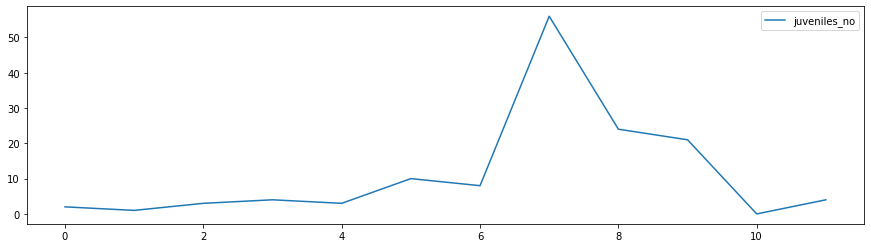

In [72]:
df.plot(figsize=(15,4));

In [37]:
s

5

R² = 0.8824886229505169
5.115951601973117 55.60445016185958 26.036168508292228 0.5836800776614173


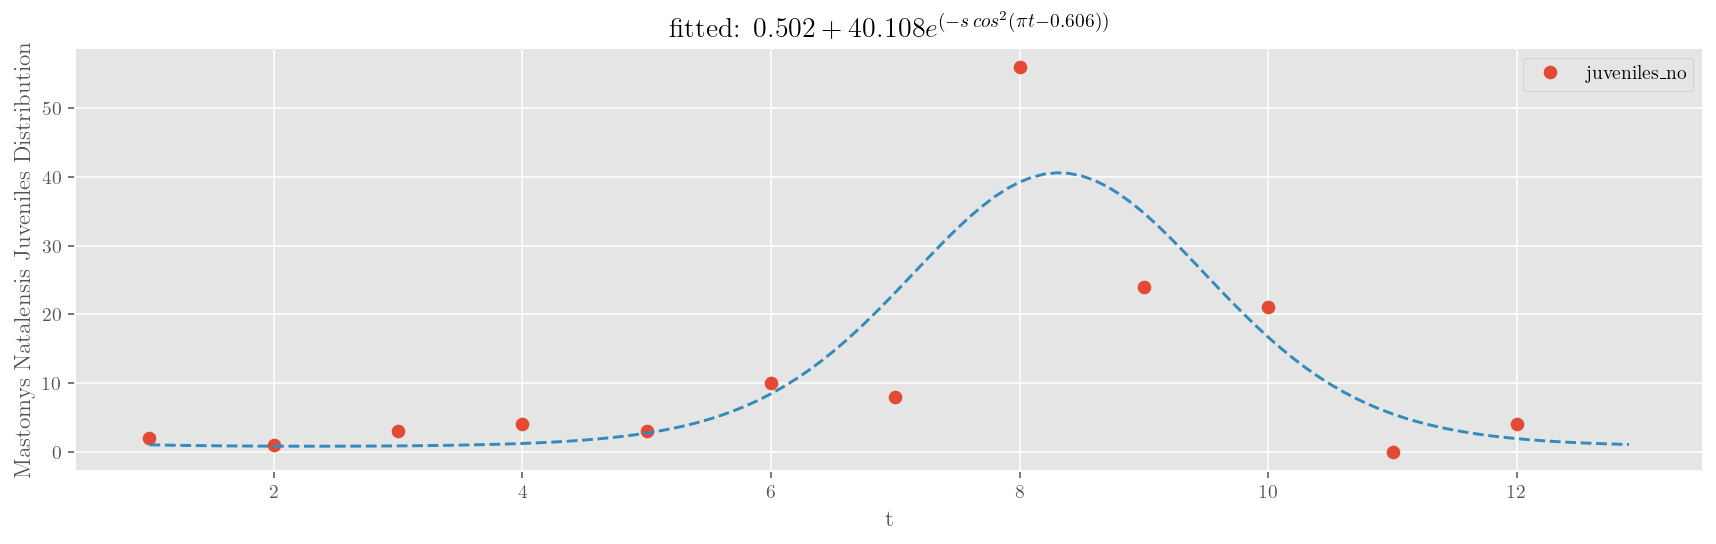

/tmp/ipykernel_3636593/3409235291.py:37: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  poly = Polygon(verts, color= 'red', alpha= 0.1, facecolor='0.9', edgecolor='0.4')


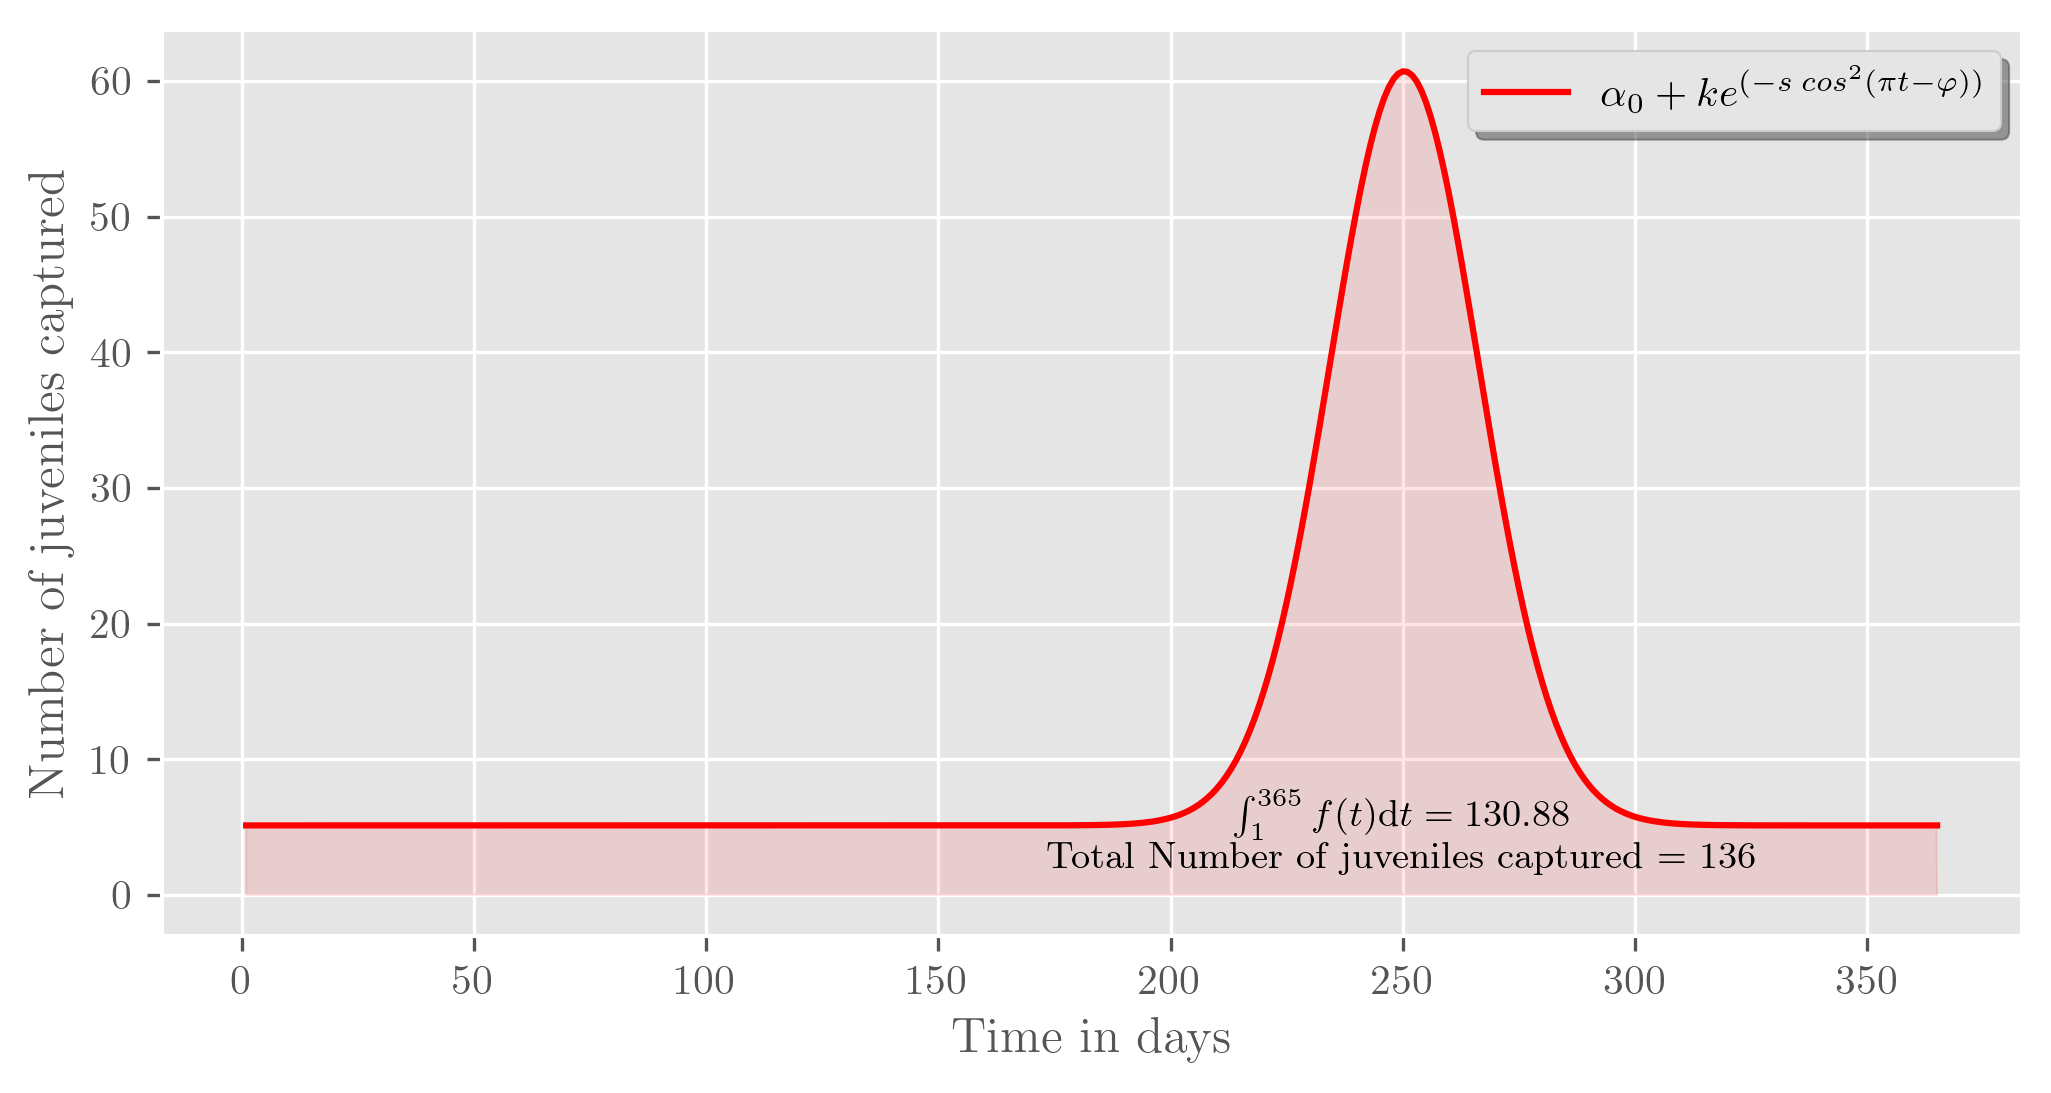

130.88404787949685


In [63]:
from numpy import *
from pylab import *
from matplotlib import rc, rcParams
import matplotlib.pyplot as plt
import numpy as np


def func(t, alpha0, k, s, varphi):
    return alpha0+ k * np.exp(-s * np.cos(np.pi*t/365 - varphi)**2)
# Create the vectors X and Y


def sum_under(x, y):
    sm = 0
    for i in range(1, len(x)):
        h = x[i] - x[i-1]
        sm += h * (y[i-1] + y[i]) / 2
    return sm

t = np.arange(1, 366, 1)

y = alpha0+ k * np.exp(-s * np.cos(np.pi*t/365 - varphi)**2)
a, b = 1, 365  # integral limits

# Create the plot
#define plot size in inches (width, height) & resolution(DPI)
fig = plt.figure(figsize=(8, 4), dpi=300)
rc('text',usetex=True)
rc('font',**{'family':'serif','serif':['Computer Modern']})
ax1 = subplot(111)
plt.plot(t,y, '-r', alpha = 1.0, label=r"$ \alpha_0 + ke^{(- s\: cos^2(\pi t - \varphi))}$")

# Make the shaded region
ix = np.arange(a, b, 0.1)
iy = func(ix, alpha0, k, s, varphi)
verts = [(a, 0), *zip(ix, iy), (b, 0)]
poly = Polygon(verts, color= 'red', alpha= 0.1, facecolor='0.9', edgecolor='0.4')
ax1.add_patch(poly)
#plt.xlim([0, 12])
ax1.text(250, 5, r"$\int_1^{365} f(t)\mathrm{d}t = 130.88$", horizontalalignment='center', fontsize=9)
ax1.text(250, 2, r"Total Number of juveniles captured = $136$", horizontalalignment='center', fontsize=9)


plt.legend(loc='best', prop={'size':10}, ncol=1, shadow=True, fancybox=True)
ax1.set_xlabel("Time in days")
ax1.set_ylabel("Number of juveniles captured")
plt.show()
x = np.arange(1, 13, 1)
y = alpha0+ k * np.exp(-s * np.cos(np.pi*t/12 - varphi)**2)
print(sum_under(x,y))

In [56]:
x

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [54]:
df['Mulungu_et_al_Pest_Manag_Sci_2013'].sum()

136

R² = 0.8875703048964307
3.3217677916740382 28.279025296628102 31.02104974427517 0.5904383876043652


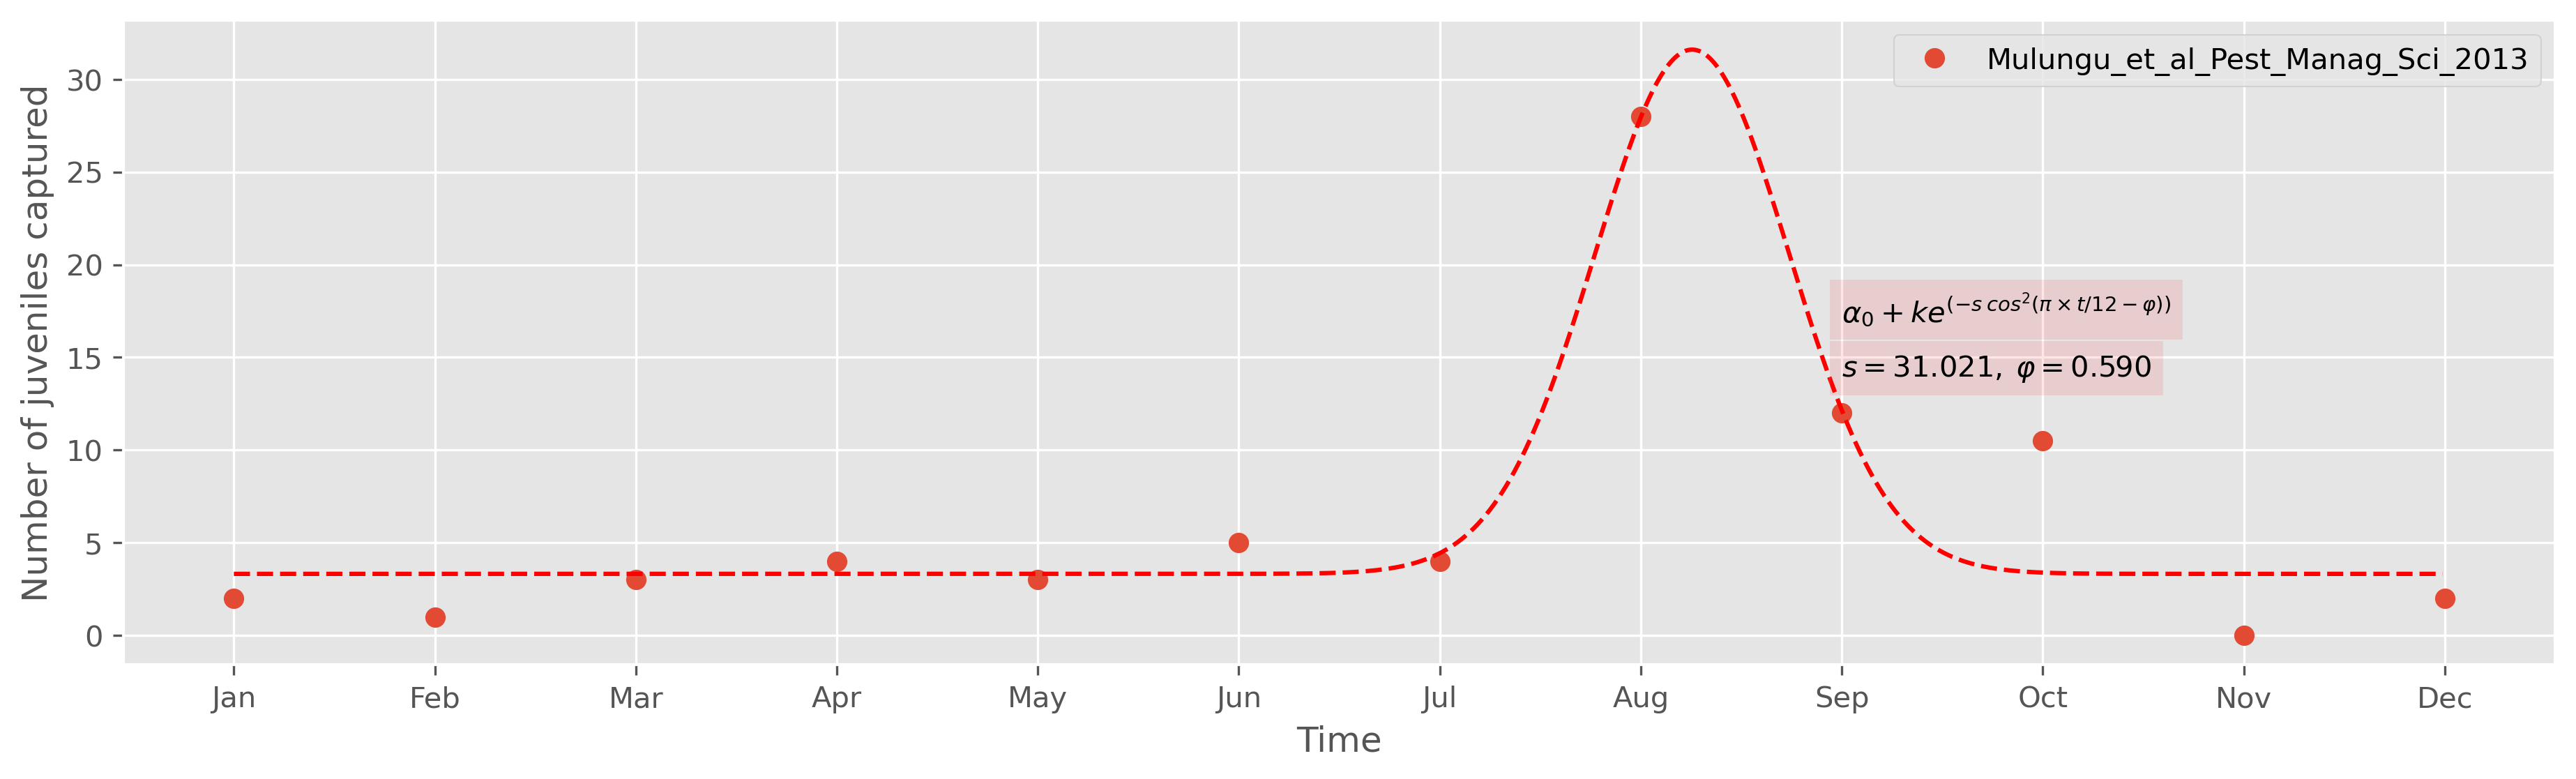

In [5]:
import numpy as np
from scipy.optimize import curve_fit
import pandas as pd

df = pd.read_csv('Data_juveniles_M_natalensis.csv', usecols=['time', 'juveniles_no'])
df =df.rename(columns={'time':'datetime'})
df['datetime'] = pd.to_datetime(df["datetime"])
#df = df.groupby(df.datetime.dt.month_year).agg(juveniles_no=('juveniles_no','sum'))
df.index = df["datetime"]
del df["datetime"]
df = df.groupby(pd.Grouper(freq="M")).sum()  # DataFrameGroupBy (grouped by Month)
#display(df)
df = df.reset_index()
df = df.groupby(df.datetime.dt.month_name().str[:3]).agg(juveniles_no=('juveniles_no','mean'))
month_dict = {'Jan':1,'Feb':2,'Mar':3, 'Apr':4, 'May':5, 'Jun':6, 'Jul':7, 'Aug':8, 'Sep':9, 'Oct':10, 'Nov':11, 'Dec':12}
df = df.reset_index()
df = df.sort_values('datetime', key = lambda x : x.apply (lambda x : month_dict[x]))
df = df.reset_index(drop=True)
df = df.reset_index()
df['index'] = np.array(df['index'])+1

def FitFun(t, alpha0, k, s, varphi):
    return alpha0+ k * np.exp(-s * np.cos(np.pi*t/12 - varphi)**2)

df =df.rename(columns={'juveniles_no':'Mulungu_et_al_Pest_Manag_Sci_2013'})
x = np.array(df['index'])
y = np.array(df['Mulungu_et_al_Pest_Manag_Sci_2013'])

p0 = (3.0, 10.0, 5.0, 0.5) # start with values near those we expect
params, fit = curve_fit(FitFun, x, y, p0)
alpha0, k, s, varphi = params
# determine quality of the fit
squaredDiffs = np.square(y - FitFun(x, alpha0, k, s, varphi))
squaredDiffsFromMean = np.square(y - np.mean(y))
rSquared = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)
print(f"R² = {rSquared}")
df['Fun_fit'] =  FitFun(x, alpha0, k, s, varphi)

print(alpha0, k, s, varphi)

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [50, 6] #[W,H]
plt.rcParams['figure.dpi'] = 300
plt.style.use('ggplot')
#fig, [ax1, ax2] = plt.subplots(2, 1, sharex=True, gridspec_kw={'height_ratios': [3,1]})
ax = df.plot(
    y='Mulungu_et_al_Pest_Manag_Sci_2013',
    x='index',
    style="o",
    #title= r"Mastomys Natalensis Juveniles Distribution",
    xlabel="Time",
    ylabel="Number of juveniles captured",
    figsize=(15,4),
    #xlim=[start_time, end_time],
    #ylim=[20.0, 85.0],
)
t = np.arange(1, 12, 0.01)
ax.plot(t, FitFun(t, alpha0, k, s, varphi), '--r', label='fit') #f"fitted: $y = {a:.2f} e^{{(-{b:.2f}x)}} + {c:.2f}$"
#ax2.plot(x, df_srt['R_0 2 fit'], '--', label=f"fitted: $y = {a:.2f} e^{{(-{b:.2f}x)}} + {c:.2f}$")
#ax.legend('best')
ax.set_xticks(range(1, len(df.index)+1));
ax.set_xticklabels(df['datetime']);
#plt.xticks(rotation=90);
plt.text(9.0, 16.93, s=r"$\alpha_0 + ke^{(- s\: cos^2(\pi\times t/12 - \varphi))}$", bbox=dict(facecolor='red', alpha=0.1))
plt.text(9.0, 14, s=r"$s = 31.021,\: \varphi = 0.590$", bbox=dict(facecolor='red', alpha=0.1))

# plt.savefig('Mastomys_natalensis_juveniles_distribution.pdf', 
#             metadata = {'Creator': 'Reju Sam John', 'Author': 'Reju', 'Title': 'Mastomys_natalensis_juveniles_distribution'},
#            bbox_inches = 'tight', pad_inches = 0.2)
plt.show()

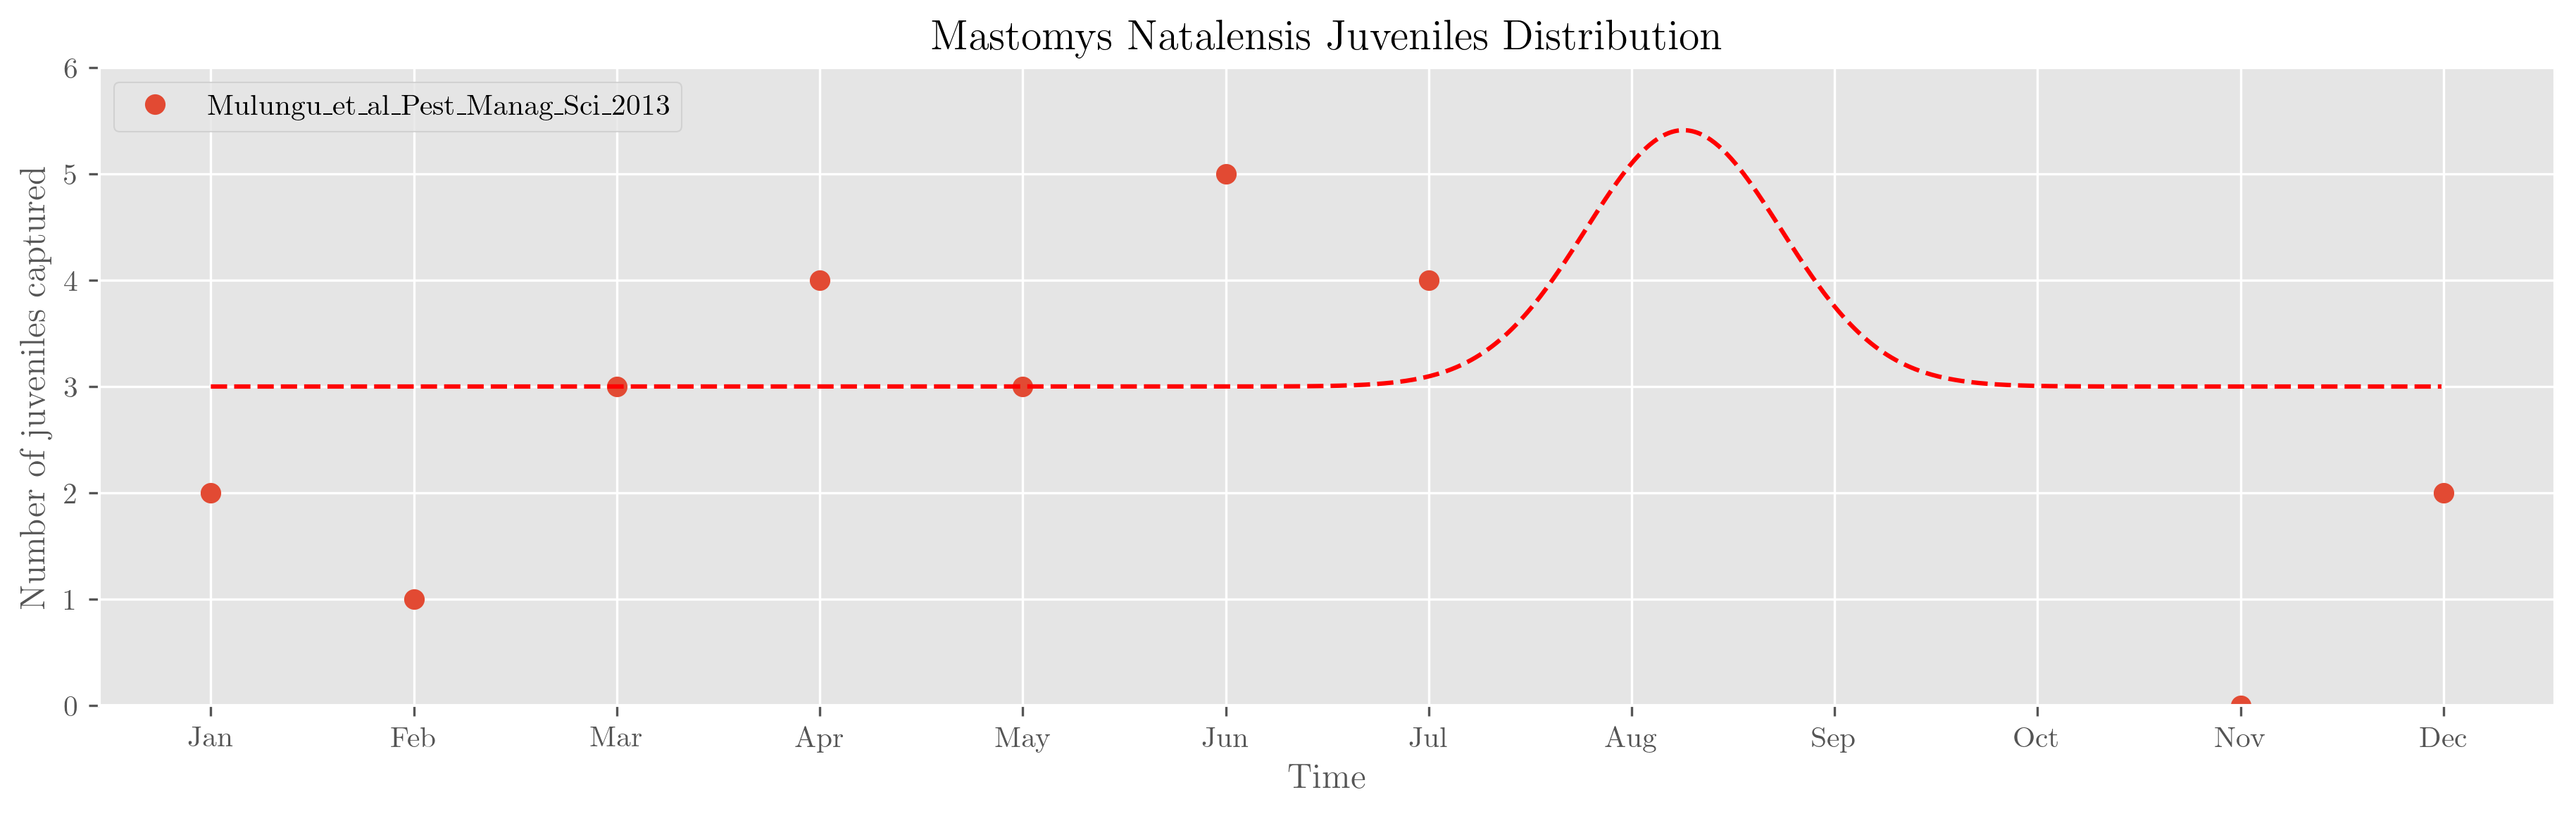

In [64]:
plt.rcParams['figure.figsize'] = [50, 6] #[W,H]
plt.rcParams['figure.dpi'] = 300
plt.style.use('ggplot')
#fig, [ax1, ax2] = plt.subplots(2, 1, sharex=True, gridspec_kw={'height_ratios': [3,1]})
ax = df.plot(
    y='Mulungu_et_al_Pest_Manag_Sci_2013',
    x='index',
    style="o",
    title= r"Mastomys Natalensis Juveniles Distribution",
    xlabel="Time",
    ylabel="Number of juveniles captured",
    figsize=(15,4),
    #xlim=[start_time, end_time],
    ylim=[0, 6],
)
t = np.arange(1, 12, 0.01)
ax.plot(t, FitFun(t, 9/3, 2.41119481248061, s, varphi), '--r', label='per capita') #f"fitted: $y = {a:.2f} e^{{(-{b:.2f}x)}} + {c:.2f}$"
#ax2.plot(x, df_srt['R_0 2 fit'], '--', label=f"fitted: $y = {a:.2f} e^{{(-{b:.2f}x)}} + {c:.2f}$")
#ax.legend('best')
ax.set_xticks(range(1, len(df.index)+1));
ax.set_xticklabels(df['datetime']);
#plt.xticks(rotation=90);
# plt.text(9.0, 16.93, s=r"$ \alpha_0 + ke^{(- s\: cos^2(\pi\times t/12 - \varphi))}$", bbox=dict(facecolor='red', alpha=0.1))
# plt.text(9.0, 14, s=r"$ \alpha_0 =3.32,\: k = 28.28,\: s = 31.02,\: \varphi = 0.59$", bbox=dict(facecolor='red', alpha=0.1))

plt.savefig('Mastomys_natalensis_juveniles_distribution_per_capita.pdf', 
            metadata = {'Creator': 'Reju Sam John', 'Author': 'Reju', 'Title': 'Mastomys_natalensis_juveniles_distribution'},
           bbox_inches = 'tight', pad_inches = 0.2)
plt.show()

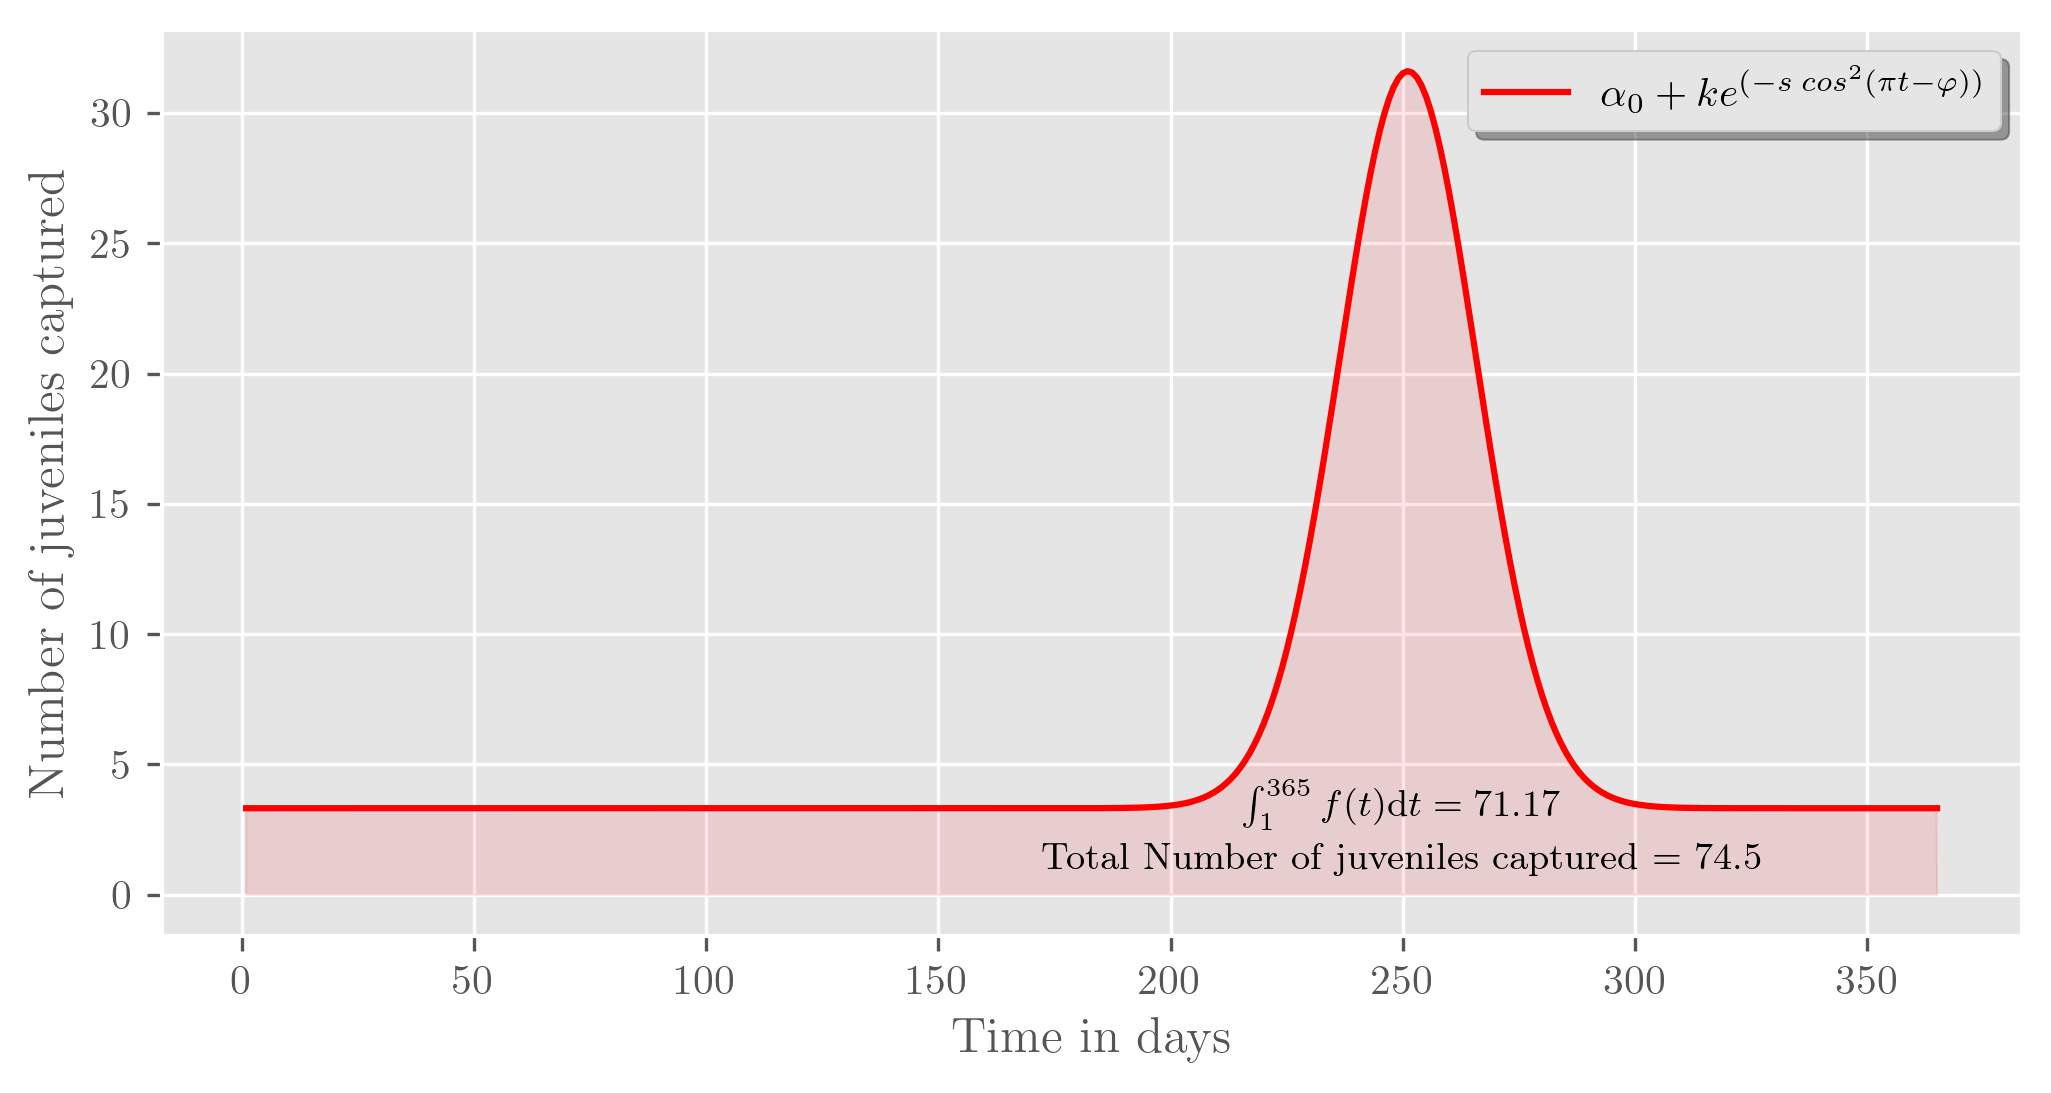

71.17823245213563


In [58]:
from numpy import *
from pylab import *
from matplotlib import rc, rcParams
import matplotlib.pyplot as plt
import numpy as np


def func(t, alpha0, k, s, varphi):
    return alpha0+ k * np.exp(-s * np.cos(np.pi*t/365 - varphi)**2)
# Create the vectors X and Y


def sum_under(x, y):
    sm = 0
    for i in range(1, len(x)):
        h = x[i] - x[i-1]
        sm += h * (y[i-1] + y[i]) / 2
    return sm

t = np.arange(1, 366, 1)

y = alpha0+ k * np.exp(-s * np.cos(np.pi*t/365 - varphi)**2)
y1 = 9/3+ 2.41119481248061 * np.exp(-s * np.cos(np.pi*t/365 - varphi)**2)
a, b = 1, 365  # integral limits

# Create the plot
#define plot size in inches (width, height) & resolution(DPI)
fig = plt.figure(figsize=(8, 4), dpi=300)
rc('text',usetex=True)
rc('font',**{'family':'serif','serif':['Computer Modern']})
ax1 = subplot(111)
plt.plot(t,y, '-r', alpha = 1.0, label=r"$ \alpha_0 + ke^{(- s\: cos^2(\pi t - \varphi))}$")
#plt.plot(t,y1, '--r', alpha = 1.0, label=r"per capita")

# Make the shaded region
ix = np.arange(a, b, 0.1)
iy = func(ix, alpha0, k, s, varphi)
verts = [(a, 0), *zip(ix, iy), (b, 0)]
poly = Polygon(verts, color= 'red', alpha= 0.1)#, facecolor='0.9', edgecolor='0.4')
ax1.add_patch(poly)
#plt.xlim([0, 12])
ax1.text(250, 3, r"$\int_1^{365} f(t)\mathrm{d}t = 71.17$", horizontalalignment='center', fontsize=9)
ax1.text(250, 1, r"Total Number of juveniles captured = $74.5$", horizontalalignment='center', fontsize=9)


plt.legend(loc='best', prop={'size':10}, ncol=1, shadow=True, fancybox=True)
ax1.set_xlabel("Time in days")
ax1.set_ylabel("Number of juveniles captured")
plt.show()
x = np.arange(1, 13, 1)
y = alpha0+ k * np.exp(-s * np.cos(np.pi*t/12 - varphi)**2)
print(sum_under(x,y))

In [ ]:
from numpy import *
from pylab import *
from matplotlib import rc, rcParams
import matplotlib.pyplot as plt
import numpy as np


def func(t, alpha0, k, s, varphi):
    return alpha0+ k * np.exp(-s * np.cos(np.pi*t/365 - varphi)**2)
# Create the vectors X and Y



y1 = 9/3+ 2.41119481248061 * np.exp(-s * np.cos(np.pi*t/365 - varphi)**2)
a, b = 1, 365  # integral limits

# Create the plot
#define plot size in inches (width, height) & resolution(DPI)
fig = plt.figure(figsize=(8, 4), dpi=300)
rc('text',usetex=True)
rc('font',**{'family':'serif','serif':['Computer Modern']})
ax1 = subplot(111)
#plt.plot(t,y, '-r', alpha = 1.0, label=r"$ \alpha_0 + ke^{(- s\: cos^2(\pi t - \varphi))}$")
plt.plot(t,y1, '--r', alpha = 1.0, label=r"per capita")

# Make the shaded region
ix = np.arange(a, b, 0.1)
iy = func(ix, alpha0, k, s, varphi)
verts = [(a, 0), *zip(ix, iy), (b, 0)]
poly = Polygon(verts, color= 'red', alpha= 0.1)#, facecolor='0.9', edgecolor='0.4')
ax1.add_patch(poly)
#plt.xlim([0, 12])
ax1.text(250, 3, r"$\int_1^{365} f(t)\mathrm{d}t = 71.17$", horizontalalignment='center', fontsize=9)
ax1.text(250, 1, r"Total Number of juveniles captured = $74.5$", horizontalalignment='center', fontsize=9)


plt.legend(loc='best', prop={'size':10}, ncol=1, shadow=True, fancybox=True)
ax1.set_xlabel("Time in days")
ax1.set_ylabel("Number of juveniles captured")
plt.show()
x = np.arange(1, 13, 1)
y = alpha0+ k * np.exp(-s * np.cos(np.pi*t/12 - varphi)**2)
print(sum_under(x,y))

In [23]:
df['Mulungu_et_al_Pest_Manag_Sci_2013'].sum()

74.5

In [27]:
70/20 # per M natalensis per 18 months

3.5

In [29]:
(70/10)/18 # per M natalensis per  months

0.3888888888888889

In [30]:
((70/10)/18)*12 # per M natalensis per yer

4.666666666666667

In [31]:
1618/90

17.977777777777778

In [42]:
1618/(90/2)

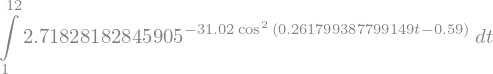

In [35]:
from sympy import *
#from sympy.abc import t
import numpy as np

#init_printing(use_unicode=False, wrap_line=False, no_global=True)


f = np.e**(-31.02 * cos((np.pi * t/12 - 0.59))**2)    

integrate(f, (t, 1, 12))

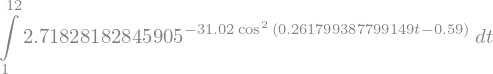

In [37]:
from sympy import *
import numpy as np

f = np.e**(-31.02 * cos(np.pi * t/12 - 0.59)**2)    

integrate(f, (t, 1, 12))

In [38]:
from scipy.integrate import quad

def integrand(t):
    return np.e**(-31.02 * cos(np.pi * t/12 - 0.59)**2) 

ans, err = quad(integrand, 1, 12)
print (ans)

1.225763899398453


In [39]:
1/0.0166

In [45]:
166/(90)

In [46]:
1.84444444444444*9

In [47]:
((1618/(90)) - (11*16.6))/1.225763899398453

In [81]:
((1618/(90/2)) - (11*(7.3223/2.02224435918426)))/1.225763899398453

In [93]:
((1618/(90/2)) - (11*(9/2.02224435918426)))/1.225763899398453

In [65]:
9/(61.51/30.4167)

In [66]:
7.3223/(61.51/30.4167)

In [74]:
(61.51/30.4167)

In [90]:
166/12 # litters per Mon

In [91]:
13.8333333333333/45 # litters per months per female

In [2]:
0.307407407407407/30

0.0102469135802469

In [92]:
1/0.307407407407407 # How many months does it take for a female to produce a litter? Or, how often can a female reproduce?

In [94]:
((1618/(90/2)) - (11*(9/3.25301204819278)))/1.225763899398453

In [29]:
((1618/(90/2)) - (11*(1.5383333333333333)))/1.225763899398453

15.528185238796658

In [25]:
(3.33309/28)*30.5

3.6306873214285713

In [31]:
1/(2.741667*365)

0.000999292046553159

In [1]:
import numpy as np
from scipy.optimize import curve_fit
import pandas as pd

df = pd.read_csv('Data_juveniles_M_natalensis.csv', usecols=['time', 'juveniles_no'])
df =df.rename(columns={'time':'datetime'})
df['datetime'] = pd.to_datetime(df["datetime"])
#df = df.groupby(df.datetime.dt.month_year).agg(juveniles_no=('juveniles_no','sum'))
df.index = df["datetime"]
del df["datetime"]
df = df.groupby(pd.Grouper(freq="M")).sum()  # DataFrameGroupBy (grouped by Month)
#display(df)
df = df.reset_index()
df = df.groupby(df.datetime.dt.month_name().str[:3]).agg(juveniles_no=('juveniles_no','mean'))
month_dict = {'Jan':1,'Feb':2,'Mar':3, 'Apr':4, 'May':5, 'Jun':6, 'Jul':7, 'Aug':8, 'Sep':9, 'Oct':10, 'Nov':11, 'Dec':12}
df = df.reset_index()
df = df.sort_values('datetime', key = lambda x : x.apply (lambda x : month_dict[x]))
df = df.reset_index(drop=True)
df = df.reset_index()
df['index'] = np.array(df['index'])+1
df

,index,datetime,juveniles_no
0,1,Jan,2.0
1,2,Feb,1.0
2,3,Mar,3.0
3,4,Apr,4.0
4,5,May,3.0
5,6,Jun,5.0
6,7,Jul,4.0
7,8,Aug,28.0
8,9,Sep,12.0
9,10,Oct,10.5


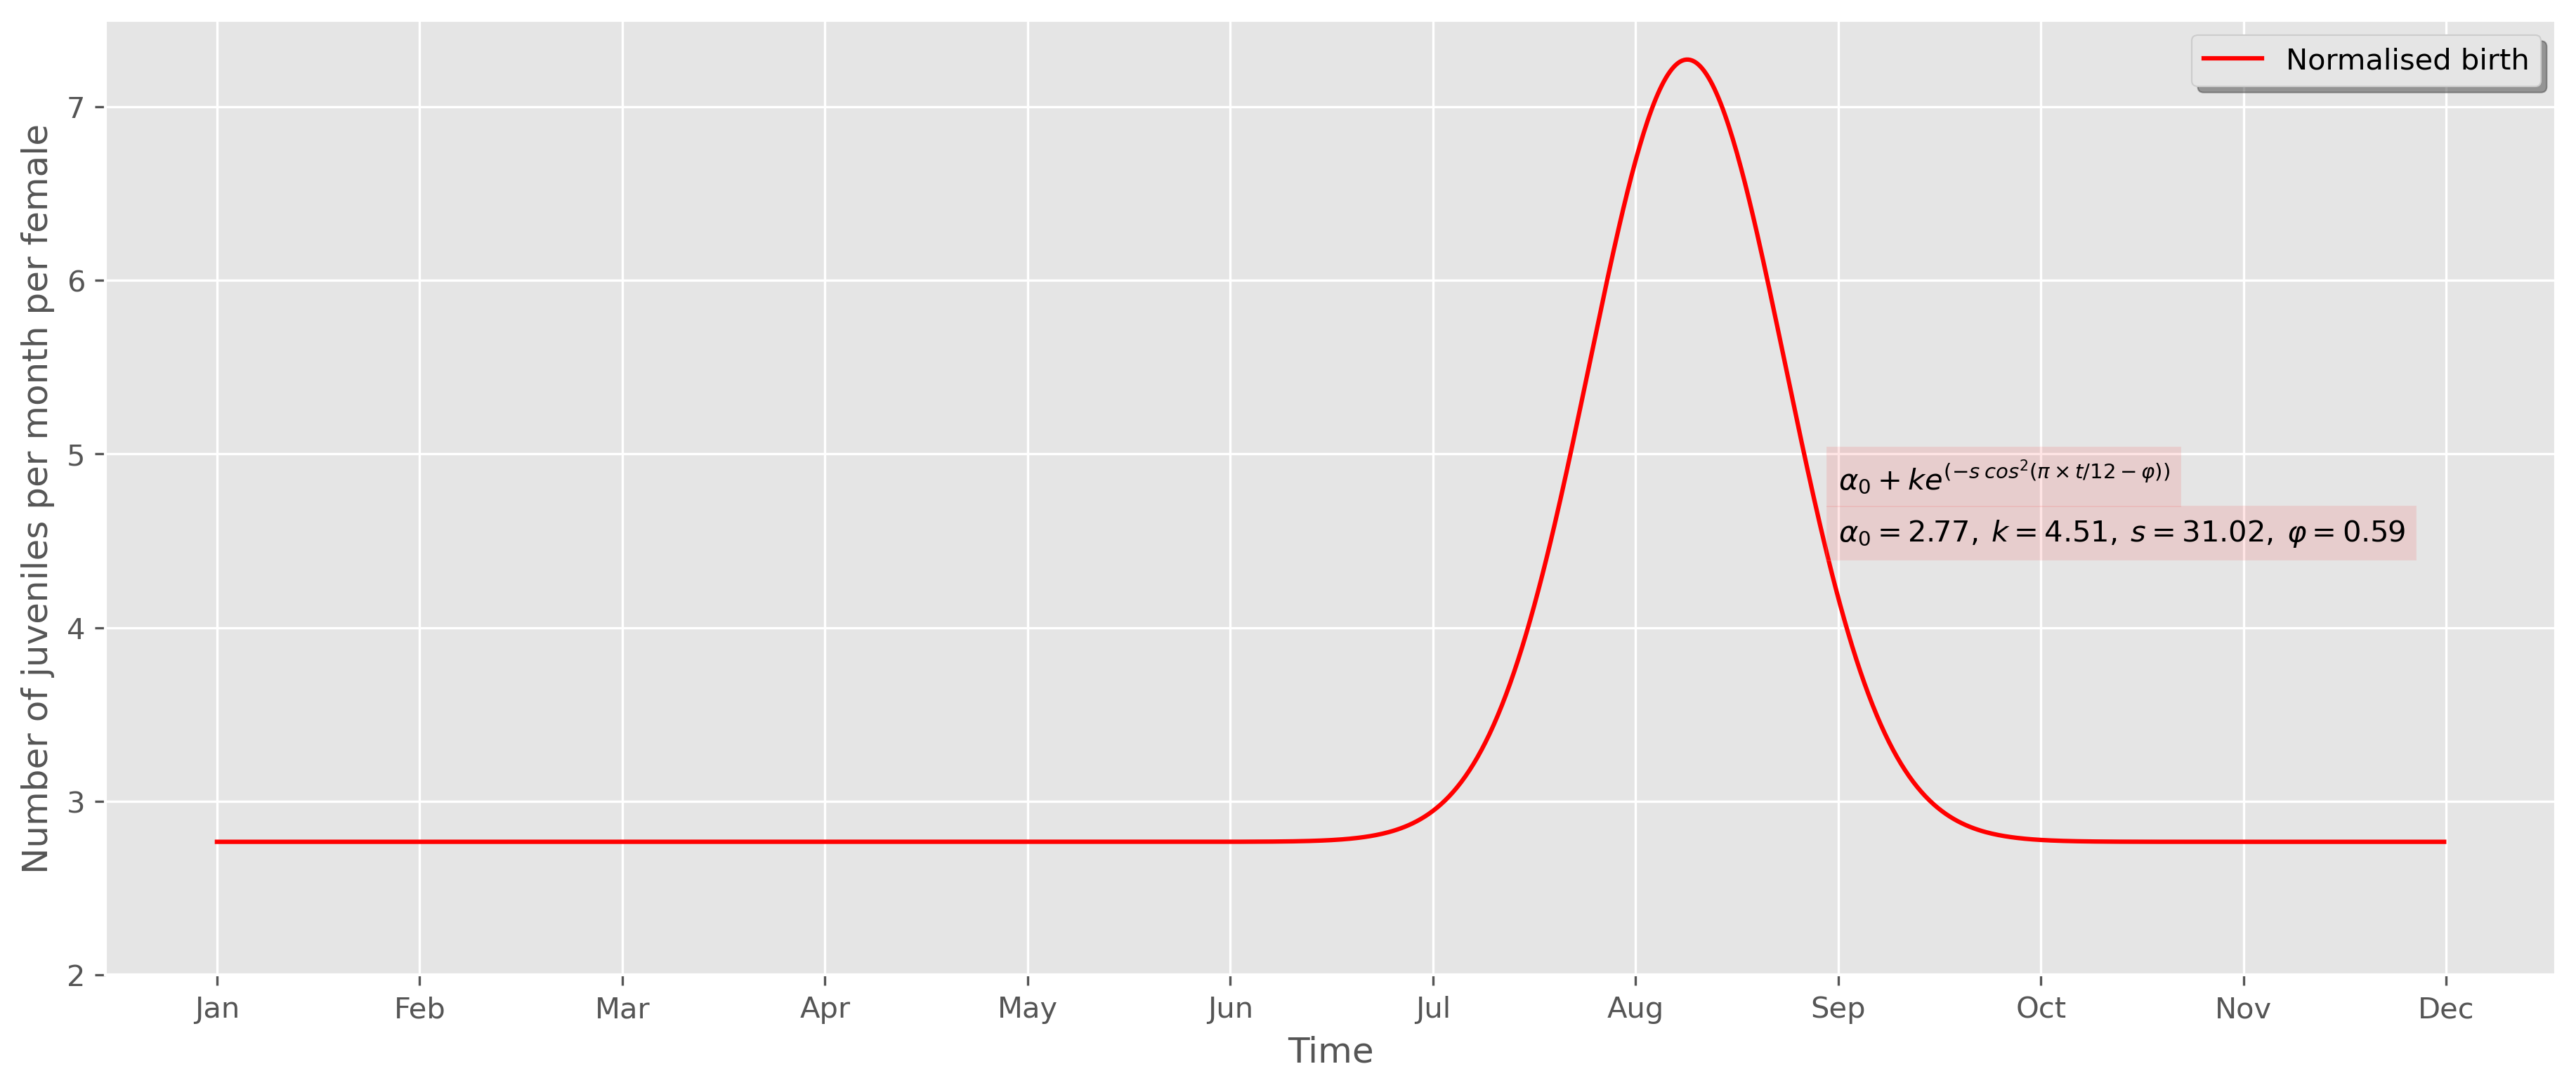

In [22]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 6] #[W,H]
plt.rcParams['figure.dpi'] = 300
plt.style.use('ggplot')

def f(t, alpha0, k, s, varphi):
    return alpha0+ k * np.exp(-s * np.cos(np.pi*t/12 - varphi)**2)
t = np.arange(1, 12, 0.01)

#plt.figure()
plt.subplot(111)
plt.plot(t, f(t, 2.76666666666666,  4.5051271496349, 31.021051124098218, 0.5904383900779714), '-r', label='Normalised birth')
#plt.legend('best')
labels = list(df['datetime'])
x1 = list(range(1, len(df.index)+1))
plt.xticks(x1, labels, rotation=0)
plt.yticks(range(2, 8), range(2, 8), rotation=0)
plt.legend(loc='best', prop={'size':10}, ncol=1, shadow=True, fancybox=True)
plt.xlabel("Time")
plt.ylabel("Number of juveniles per month per female")

plt.text(9.0, 4.8, s=r"$ \alpha_0 + ke^{(- s\: cos^2(\pi\times t/12 - \varphi))}$", bbox=dict(facecolor='red', alpha=0.1))
plt.text(9.0, 4.5, s=r"$ \alpha_0 =2.77,\: k = 4.51,\: s = 31.02,\: \varphi = 0.59$", bbox=dict(facecolor='red', alpha=0.1))

plt.savefig('Mastomys_natalensis_juveniles_distribution_per_capita.pdf', 
            metadata = {'Creator': 'Reju Sam John', 'Author': 'Reju', 'Title': 'Mastomys_natalensis_juveniles_distribution'},
           bbox_inches = 'tight', pad_inches = 0.2)
plt.show()
#plt.show()

In [101]:
ax

['Jan',
 'Feb',
 'Mar',
 'Apr',
 'May',
 'Jun',
 'Jul',
 'Aug',
 'Sep',
 'Oct',
 'Nov',
 'Dec']